In [1]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sat Jan 14 13:08:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [11]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/2360/lab4/ex3'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/2360/lab4/ex3
lab3_ex2.cu	 lab4_ex3_pinned.cu  lab4_ex3_unified.cu
lab4_ex3_pinned  lab4_ex3_unified


In [13]:
!nvcc -arch=sm_75 ./lab3_ex2.cu -o lab3_ex2
!nvprof ./lab3_ex2 512 1024 1024 4096

Input matrix dim (512 x 1024) (1024 x 4096) (512 x 4096)
==12591== NVPROF is profiling process 12591, command: ./lab3_ex2 512 1024 1024 4096
==12591== Profiling application: ./lab3_ex2 512 1024 1024 4096
==12591== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   84.96%  99.899ms         1  99.899ms  99.899ms  99.899ms  gemm(double*, double*, double*, int, int, int, int)
                    8.24%  9.6881ms         1  9.6881ms  9.6881ms  9.6881ms  [CUDA memcpy DtoH]
                    6.80%  7.9996ms         2  3.9998ms  849.75us  7.1499ms  [CUDA memcpy HtoD]
      API calls:   72.15%  314.61ms         3  104.87ms  110.30us  314.37ms  cudaMalloc
                   22.92%  99.941ms         1  99.941ms  99.941ms  99.941ms  cudaDeviceSynchronize
                    4.44%  19.340ms         3  6.4466ms  1.0302ms  10.938ms  cudaMemcpy
                    0.35%  1.5315ms         3  510.51us  184.61us  1.1008ms  cudaFree
    

In [14]:
!nvprof ./lab3_ex2 1024 1024  1024 4096

Input matrix dim (1024 x 1024) (1024 x 4096) (1024 x 4096)
==12820== NVPROF is profiling process 12820, command: ./lab3_ex2 1024 1024 1024 4096
==12820== Profiling application: ./lab3_ex2 1024 1024 1024 4096
==12820== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   87.29%  199.80ms         1  199.80ms  199.80ms  199.80ms  gemm(double*, double*, double*, int, int, int, int)
                    8.76%  20.061ms         1  20.061ms  20.061ms  20.061ms  [CUDA memcpy DtoH]
                    3.95%  9.0383ms         2  4.5191ms  1.8844ms  7.1539ms  [CUDA memcpy HtoD]
      API calls:   58.22%  324.90ms         3  108.30ms  121.76us  324.63ms  cudaMalloc
                   35.82%  199.87ms         1  199.87ms  199.87ms  199.87ms  cudaDeviceSynchronize
                    5.53%  30.858ms         3  10.286ms  2.1297ms  21.338ms  cudaMemcpy
                    0.32%  1.7752ms         3  591.72us  217.89us  1.1430ms  cudaFree


In [15]:
!nvprof ./lab3_ex2 2048 1536 1536 4096

Input matrix dim (2048 x 1536) (1536 x 4096) (2048 x 4096)
==14363== NVPROF is profiling process 14363, command: ./lab3_ex2 2048 1536 1536 4096
==14363== Profiling application: ./lab3_ex2 2048 1536 1536 4096
==14363== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   86.33%  367.02ms         1  367.02ms  367.02ms  367.02ms  gemm(double*, double*, double*, int, int, int, int)
                    9.67%  41.128ms         1  41.128ms  41.128ms  41.128ms  [CUDA memcpy DtoH]
                    4.00%  17.004ms         2  8.5022ms  6.3272ms  10.677ms  [CUDA memcpy HtoD]
      API calls:   49.56%  367.08ms         1  367.08ms  367.08ms  367.08ms  cudaDeviceSynchronize
                   42.01%  311.12ms         3  103.71ms  141.33us  310.81ms  cudaMalloc
                    8.08%  59.867ms         3  19.956ms  6.5737ms  42.420ms  cudaMemcpy
                    0.27%  2.0260ms         3  675.34us  223.71us  1.1498ms  cudaFree


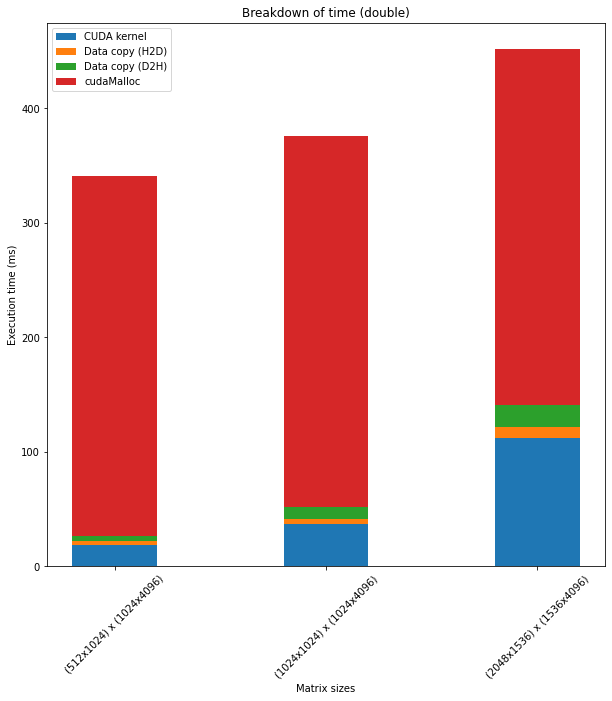

In [5]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(1024x1024) x (1024x4096)', '(2048x1536) x (1536x4096)']
cuda_kernel = np.array([18.735, 37.398,  112.18])
datacpy_d2h = np.array([4.1418, 9.7461, 19.800])
datacpy_h2d = np.array([3.6500, 4.3047,  9.1401])
cudaMalloc = np.array([314.6, 324.90, 311.12])

width = 0.4
fig, ax = plt.subplots(1, 1)

ax.bar(matrix_sizes, cuda_kernel, width, label='CUDA kernel')
ax.bar(matrix_sizes, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H2D)')
ax.bar(matrix_sizes, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D2H)')
ax.bar(matrix_sizes, cudaMalloc, width, bottom=datacpy_d2h+datacpy_h2d+cuda_kernel,
       label='cudaMalloc')

ax.set_xlabel('Matrix sizes')
ax.set_ylabel('Execution time (ms)')
ax.set_title('Breakdown of time (double)')
ax.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.set_size_inches(20/2, 10, forward=True)
plt.show()

In [16]:
!nvcc -arch=sm_75 ./lab4_ex3_pinned.cu -o lab4_ex3_pinned
!nvprof ./lab4_ex3_pinned 512 1024 1024 4096


Input matrix dim (512 x 1024) (1024 x 4096) (512 x 4096)
==18403== NVPROF is profiling process 18403, command: ./lab4_ex3_pinned 512 1024 1024 4096
CPU and GPU results are equal.
==18403== Profiling application: ./lab4_ex3_pinned 512 1024 1024 4096
==18403== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   89.50%  18.749ms         1  18.749ms  18.749ms  18.749ms  gemm(float*, float*, float*, int, int, int, int)
                    7.45%  1.5611ms         2  780.57us  176.54us  1.3846ms  [CUDA memcpy HtoD]
                    3.04%  637.82us         1  637.82us  637.82us  637.82us  [CUDA memcpy DtoH]
      API calls:   93.38%  327.77ms         3  109.26ms  3.5475ms  317.27ms  cudaHostAlloc
                    6.00%  21.044ms         3  7.0146ms  222.46us  19.418ms  cudaMemcpy
                    0.30%  1.0474ms         7  149.63us     400ns  740.40us  cudaFree
                    0.14%  507.74us         3  169.25us  1

In [5]:
!nvprof ./lab4_ex3_pinned 1024 1024  1024 4096

Input matrix dim (1024 x 1024) (1024 x 4096) (1024 x 4096)
==2466== NVPROF is profiling process 2466, command: ./lab4_ex3_pinned 1024 1024 1024 4096
CPU and GPU results are equal.
==2466== Profiling application: ./lab4_ex3_pinned 1024 1024 1024 4096
==2466== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   92.56%  37.444ms         1  37.444ms  37.444ms  37.444ms  gemm(float*, float*, float*, int, int, int, int)
                    4.29%  1.7346ms         2  867.30us  346.46us  1.3881ms  [CUDA memcpy HtoD]
                    3.15%  1.2734ms         1  1.2734ms  1.2734ms  1.2734ms  [CUDA memcpy DtoH]
      API calls:   88.61%  333.59ms         3  111.20ms  6.6653ms  319.62ms  cudaHostAlloc
                   10.77%  40.532ms         3  13.511ms  395.56us  38.730ms  cudaMemcpy
                    0.31%  1.1489ms         7  164.13us     658ns  741.21us  cudaFree
                    0.15%  571.13us         3  190.38us  1

In [6]:
!nvprof ./lab4_ex3_pinned 2048 1536 1536 4096

Input matrix dim (2048 x 1536) (1536 x 4096) (2048 x 4096)
==2734== NVPROF is profiling process 2734, command: ./lab4_ex3_pinned 2048 1536 1536 4096
CPU and GPU results are NOT equal.
==2734== Profiling application: ./lab4_ex3_pinned 2048 1536 1536 4096
==2734== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   95.25%  113.05ms         1  113.05ms  113.05ms  113.05ms  gemm(float*, float*, float*, int, int, int, int)
                    2.60%  3.0807ms         2  1.5404ms  1.0223ms  2.0584ms  [CUDA memcpy HtoD]
                    2.15%  2.5548ms         1  2.5548ms  2.5548ms  2.5548ms  [CUDA memcpy DtoH]
      API calls:   73.78%  343.49ms         3  114.50ms  9.7495ms  320.73ms  cudaHostAlloc
                   25.52%  118.80ms         3  39.600ms  1.0959ms  115.63ms  cudaMemcpy
                    0.40%  1.8831ms         7  269.02us     758ns  1.1011ms  cudaFree
                    0.14%  666.24us         3  222.08u

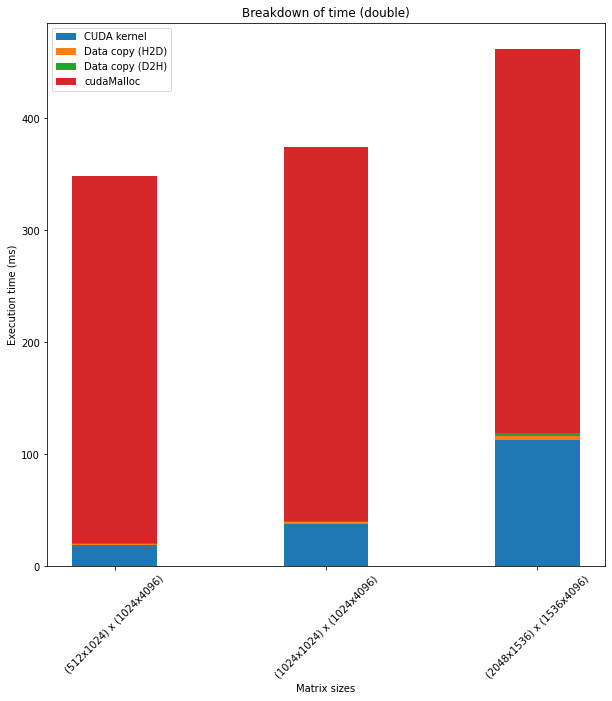

In [17]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(1024x1024) x (1024x4096)', '(2048x1536) x (1536x4096)']
cuda_kernel = np.array([18.744, 37.444, 113.05])
datacpy_d2h = np.array([0.6373, 1.2741, 2.5548])
datacpy_h2d = np.array([1.5420, 1.7346, 3.0807])
cudaMalloc = np.array([327.77, 333.59, 343.49])

width = 0.4
fig, ax = plt.subplots(1, 1)

ax.bar(matrix_sizes, cuda_kernel, width, label='CUDA kernel')
ax.bar(matrix_sizes, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H2D)')
ax.bar(matrix_sizes, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D2H)')
ax.bar(matrix_sizes, cudaMalloc, width, bottom=datacpy_d2h+datacpy_h2d+cuda_kernel,
       label='cudaMalloc')

ax.set_xlabel('Matrix sizes')
ax.set_ylabel('Execution time (ms)')
ax.set_title('Breakdown of time (double)')
ax.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.set_size_inches(20/2, 10, forward=True)
plt.show()

In [4]:
!nvcc -arch=sm_75 ./lab4_ex3_unified.cu -o lab4_ex3_unified
!nvprof ./lab4_ex3_unified 512 1024 1024 4096

Input matrix dim (512 x 1024) (1024 x 4096) (512 x 4096)
==1487== NVPROF is profiling process 1487, command: ./lab4_ex3_unified 512 1024 1024 4096
==1487== Profiling application: ./lab4_ex3_unified 512 1024 1024 4096
==1487== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  113.30ms         1  113.30ms  113.30ms  113.30ms  gemm(double*, double*, double*, int, int, int, int)
      API calls:   73.26%  326.62ms         4  81.655ms  12.360us  326.55ms  cudaMallocManaged
                   25.42%  113.31ms         1  113.31ms  113.31ms  113.31ms  cudaDeviceSynchronize
                    1.18%  5.2632ms         4  1.3158ms  766.98us  1.8862ms  cudaFree
                    0.08%  342.63us         1  342.63us  342.63us  342.63us  cuDeviceTotalMem
                    0.04%  167.53us       101  1.6580us     127ns  76.693us  cuDeviceGetAttribute
                    0.01%  64.926us         1  64.926us  64.926us  64.926

In [9]:
!nvprof ./lab4_ex3_unified 1024 1024  1024 4096

Input matrix dim (1024 x 1024) (1024 x 4096) (1024 x 4096)
==4155== NVPROF is profiling process 4155, command: ./lab4_ex3_unified 1024 1024 1024 4096
==4155== Profiling application: ./lab4_ex3_unified 1024 1024 1024 4096
==4155== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  201.03ms         1  201.03ms  201.03ms  201.03ms  gemm(double*, double*, double*, int, int, int, int)
      API calls:   62.18%  341.27ms         4  85.318ms  16.028us  341.19ms  cudaMallocManaged
                   36.63%  201.04ms         1  201.04ms  201.04ms  201.04ms  cudaDeviceSynchronize
                    1.07%  5.8927ms         4  1.4732ms  575.91us  2.2015ms  cudaFree
                    0.06%  344.03us         1  344.03us  344.03us  344.03us  cuDeviceTotalMem
                    0.03%  168.98us       101  1.6730us     130ns  69.499us  cuDeviceGetAttribute
                    0.01%  77.290us         1  77.290us  77.290us  77

In [10]:
!nvprof ./lab4_ex3_unified 2048 1536 1536 4096

Input matrix dim (2048 x 1536) (1536 x 4096) (2048 x 4096)
==4444== NVPROF is profiling process 4444, command: ./lab4_ex3_unified 2048 1536 1536 4096
==4444== Profiling application: ./lab4_ex3_unified 2048 1536 1536 4096
==4444== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  366.30ms         1  366.30ms  366.30ms  366.30ms  gemm(double*, double*, double*, int, int, int, int)
      API calls:   51.27%  366.31ms         1  366.31ms  366.31ms  366.31ms  cudaDeviceSynchronize
                   47.02%  335.96ms         4  83.990ms  12.152us  335.89ms  cudaMallocManaged
                    1.60%  11.449ms         4  2.8623ms  1.4627ms  4.4485ms  cudaFree
                    0.06%  416.59us         1  416.59us  416.59us  416.59us  cuDeviceTotalMem
                    0.02%  171.91us       101  1.7020us     136ns  70.943us  cuDeviceGetAttribute
                    0.01%  103.00us         1  103.00us  103.00us  10

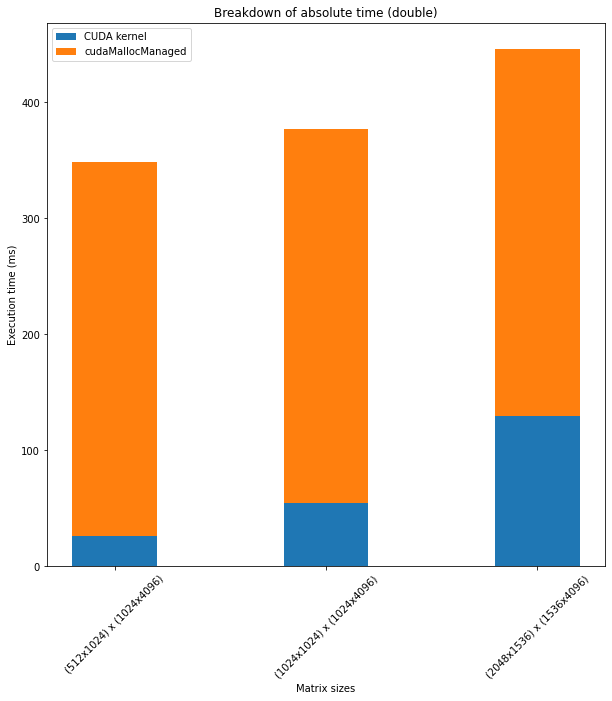

In [7]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(1024x1024) x (1024x4096)', '(2048x1536) x (1536x4096)']
cuda_kernel_abs = np.array([26.032, 54.271, 129.65])
cudaMallocManaged_abs = np.array([322.76, 322.24, 316.38])

width = 0.4
fig, ax = plt.subplots(1, 1)

ax.bar(matrix_sizes, cuda_kernel_abs, width, label='CUDA kernel')
ax.bar(matrix_sizes, cudaMallocManaged_abs, width, bottom=cuda_kernel_abs,
       label='cudaMallocManaged')

ax.set_xlabel('Matrix sizes')
ax.set_ylabel('Execution time (ms)')
ax.set_title('Breakdown of absolute time (double)')
ax.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.set_size_inches(20/2, 10, forward=True)
plt.show()